In [335]:
# ran 
# python3 tools/predict.py         /home/viktor/Documents/kaggle/kaggle_llm/data/wiki-sci-2-w-sentence-context/test_1_and_2.csv         --output-dir ./preds/deberta-v3-large-on-raw_questions_wiki_sci_1-eval-kaggle-all-folds-grad-accum-16-2 --max-input 256 --preprocess_type "deotte"

# WHERE I'VE ADDED
#  df['context_sentences'] = df['context'].apply(lambda x: x.split(". "))
# df = df.explode('context_sentences').reset_index(drop=True)
# df['context'] = df['context_sentences']

In [336]:
import pandas as pd


df_input = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/wiki-sci-2-w-sentence-context/test_1_and_2.csv")
df_input['id'] = df_input.index

def get_context(text):
    x = text.split(" ### ")
    # remove empty strings
    x = [x for x in x if len(x) > 0]
    
    assert len(x) == 2, f"Unsuccesful context splitting . len(x) = {len(x)}, x={x}"
    return x[0]


df_input['context'] = df_input['prompt'].apply(lambda x: get_context(x))

def get_prompt(text):
    x = text.split(" ### ")
    # remove empty strings
    x = [x for x in x if len(x) > 0]
    assert len(x) == 2, f"Unsuccesful prompt splitting . len(x) = {len(x)}"
    return x[1]

df_input['prompt'] = df_input['prompt'].apply(lambda x: get_prompt(x))

# df_input['context_sentences'] = df_input['context'].apply(lambda x: x.split(". "))
# df_input = df_input.explode('context_sentences').reset_index(drop=True)
# df_input['context'] = df_input['context_sentences']


# df_2 = df_input.copy()
# df_2['context'] = df_2['context'].apply(lambda x: ". ".join(x.split(". ")[5:]))

# df_3 = df_input.copy()
# df_3['context'] = df_3['context'].apply(lambda x: ". ".join(x.split(". ")[10:]))

# df_4 = df_input.copy()
# df_4['context'] = df_4['context'].apply(lambda x: ". ".join(x.split(". ")[15:]))

# df_input = pd.concat([df_input, df_2, df_3, df_4]).reset_index(drop=True)


# df_1 = df_input.copy()
# df_1['context'] = df_1.apply(lambda x: x['A'], axis=1)

# df_2 = df_input.copy()
# df_2['context'] = df_2.apply(lambda x: x['B'], axis=1)

# df_3 = df_input.copy()
# df_3['context'] = df_3.apply(lambda x: x['C'], axis=1)

# df_4 = df_input.copy()
# df_4['context'] = df_4.apply(lambda x: x['D'], axis=1)

# df_5 = df_input.copy()
# df_5['context'] = df_5.apply(lambda x: x['E'], axis=1)

# df_input = pd.concat([df_1, df_2, df_3, df_4, df_5]).reset_index(drop=True)


df_input['context'] = df_input.apply(lambda x: x['context'][:900] + " " + x[x['answer']], axis=1)


df_input['id'] = df_input.index
df_input

,Unnamed: 0,prompt,A,B,C,D,E,answer,id,context
0,0,Which of the following statements accurately ...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,0,Context: The homogeneously distributed mass of...
1,1,Which of the following is an accurate definit...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,1,"Context: To describe these systems, it is conv..."
2,2,Which of the following statements accurately ...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,2,"Context: ""Caput Medusae"" [Latin] means ""Head o..."
3,3,What is the significance of regularization in...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,3,Context: (Another way to avoid the infinity...
4,4,Which of the following statements accurately ...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,4,"Context: The finer the grating spacing, the gr..."
...,...,...,...,...,...,...,...,...,...,...
195,195,What is the relation between the three moment...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,195,Context: Then the bending moments at the thr...
196,196,"What is the throttling process, and why is it...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,196,Context: Most liquids such as hydraulic oils w...
197,197,What happens to excess base metal as a soluti...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B,197,"Context: Instead, an examination of the micros..."
198,198,"What is the relationship between mass, force,...",Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is a property that determines the size of...,D,198,Context: Under Sir Isaac Newton's -year-old la...


In [337]:
df_preds = pd.read_csv("../preds/deberta-v3-large-on-raw_questions_wiki_sci_1-eval-kaggle-all-folds-grad-accum-16-3/deberta-v3-data-wiki_sci-with-wiki-sentence-context-eval-kaggle-all-folds-grad-accum-128-60k-viktor-dataset-deotte-preproc-deberta-v3-large-2023-09-10-00-56-02-checkpoint-22500.csv")

df_preds

,id,score0,score1,score2,score3,score4,prediction
0,0,0.335753,0.695103,0.198719,-0.531988,0.285659,D C E
1,1,-0.470415,0.536287,0.332405,0.439984,0.432466,A C E
2,2,-0.687165,-0.056215,-0.621251,-0.350849,-0.124886,A C D
3,3,-0.587046,0.351128,-0.664490,0.174010,0.245479,C A D
4,4,0.152344,0.510737,0.518145,-0.520094,0.420676,D A E
...,...,...,...,...,...,...,...
195,195,0.325923,0.463463,-0.303445,0.623660,0.444911,C A E
196,196,0.373630,-0.757769,-0.344868,0.349569,0.212258,B C E
197,197,-0.681727,-0.691009,-0.085280,-0.162696,-0.154961,B A D
198,198,0.554083,0.359948,0.248718,-0.085673,0.703014,D C B


In [338]:
df_merged = df_input.merge(df_preds, on='id', how='inner')
df_merged[100:110]

,Unnamed: 0,prompt,A,B,C,D,E,answer,id,context,score0,score1,score2,score3,score4,prediction
100,100,What is a virtual particle?,A particle that is not affected by the strong ...,A particle that is not affected by the weak fo...,A particle that is created in a laboratory for...,A particle that is not directly observable but...,A particle that is directly observable and can...,D,100,"Context: In physics, a free particle is a part...",0.466293,0.445361,0.485573,-0.312606,0.500721,D B A
101,101,"Who proposed the principle of ""complexity fro...",Ilya Prigogine in 1979,Henri Atlan in 1972,Democritus and Lucretius in ancient times,None of the above.,René Descartes in 1637,B,101,Context: The Bourbaki school considered the st...,-0.127622,-0.447899,0.335924,0.645444,0.503642,B A C
102,102,What is the order parameter that breaks the e...,None of the above.,A thin cylindrical plastic rod.,A condensed-matter collective field ψ.,The cosmic microwave background.,A component of the Higgs field.,C,102,Context: The same comment about us not tending...,0.454849,0.427850,-0.392035,0.504439,0.449339,C B E
103,103,What is the reason for the sun appearing slig...,The sun appears yellowish due to a reflection ...,"The longer wavelengths of light, such as red a...",The sun appears yellowish due to the scatterin...,The sun emits a yellow light due to its own sp...,The atmosphere absorbs the shorter wavelengths...,B,103,"Context: Roughly speaking, the red light from ...",0.661400,-0.371540,-0.547846,0.352415,0.013285,C B E
104,104,What is the Landau-Lifshitz-Gilbert equation ...,The Landau-Lifshitz-Gilbert equation is a diff...,The Landau-Lifshitz-Gilbert equation is a diff...,The Landau-Lifshitz-Gilbert equation is a diff...,The Landau-Lifshitz-Gilbert equation is a diff...,The Landau-Lifshitz-Gilbert equation is a diff...,C,104,"Context: In physics, the Landau–Lifshitz equat...",0.372666,0.112187,-0.812515,-0.097473,0.422910,C D B
105,105,What is spatial dispersion?,Spatial dispersion is a phenomenon in the phys...,Spatial dispersion is a phenomenon in the phys...,Spatial dispersion is a phenomenon in the phys...,Spatial dispersion is a phenomenon in the phys...,Spatial dispersion is a phenomenon in the phys...,D,105,Context: Spatial dispersion refers to the non-...,0.457326,0.371926,0.603938,-0.510166,-0.165869,D E B
106,106,What are the constituents of cold dark matter?,"They are unknown, but possibilities include la...",They are known to be black holes and Preon stars.,They are only MACHOs.,They are clusters of brown dwarfs.,They are new particles such as RAMBOs.,A,106,Context: These observations show that a large...,-0.425626,0.400317,0.525011,0.490133,0.377785,A E B
107,107,What is the mechanism of FTIR?,"The mechanism of FTIR is called ray optics, wh...","The mechanism of FTIR is called scattering, wh...",The mechanism of FTIR is called frustrated TIR...,The mechanism of FTIR is called evanescent-wav...,The mechanism of FTIR is called total internal...,D,107,"Context: This effect, together with the strong...",0.488164,0.485055,-0.361348,-0.524143,0.348022,D C E
108,108,What is the origin of the permanent moment in...,The permanent moment is generally due to the s...,The permanent moment is due to the alignment o...,The permanent moment is due to the torque prov...,The permanent moment is due to the quantum-mec...,The permanent moment is due to the interaction...,A,108,"Context: Because of Hund's rules, the first fe...",-0.740812,0.526322,0.345788,-0.021081,0.232742,A D E
109,109,What is the reason that Newton's second law c...,"The existence of particle spin, which is linea...","The existence of particle spin, which is angul...","The existence of particle spin, which is linea...","The existence of particle spin, which is angul...","The existence of particle spin, which is angul...",D,109,Context: This arises from the fact that althou...,0.589753,0.353043,0.328470,-0.540918,0.356465,D C B


In [339]:
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

df_merged[['score_A','score_B','score_C','score_D','score_E']] = df_merged[['score0','score1','score2','score3','score4']].apply(lambda x: softmax(-x.values), axis=1, result_type='expand')
df_merged

,Unnamed: 0,prompt,A,B,C,D,E,answer,id,context,...,score1,score2,score3,score4,prediction,score_A,score_B,score_C,score_D,score_E
0,0,Which of the following statements accurately ...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,0,Context: The homogeneously distributed mass of...,...,0.695103,0.198719,-0.531988,0.285659,D C E,0.159289,0.111204,0.182683,0.379351,0.167472
1,1,Which of the following is an accurate definit...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,1,"Context: To describe these systems, it is conv...",...,0.536287,0.332405,0.439984,0.432466,A C E,0.381497,0.139408,0.170935,0.153501,0.154659
2,2,Which of the following statements accurately ...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,2,"Context: ""Caput Medusae"" [Latin] means ""Head o...",...,-0.056215,-0.621251,-0.350849,-0.124886,A C D,0.266482,0.141791,0.249483,0.190374,0.151870
3,3,What is the significance of regularization in...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,3,Context: (Another way to avoid the infinity...,...,0.351128,-0.664490,0.174010,0.245479,C A D,0.296385,0.115988,0.320251,0.138463,0.128913
4,4,Which of the following statements accurately ...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,4,"Context: The finer the grating spacing, the gr...",...,0.510737,0.518145,-0.520094,0.420676,D A E,0.195461,0.136588,0.135580,0.382910,0.149460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,What is the relation between the three moment...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,195,Context: Then the bending moments at the thr...,...,0.463463,-0.303445,0.623660,0.444911,C A E,0.185934,0.162042,0.348892,0.138056,0.165076
196,196,"What is the throttling process, and why is it...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,196,Context: Most liquids such as hydraulic oils w...,...,-0.757769,-0.344868,0.349569,0.212258,B C E,0.119749,0.371220,0.245647,0.122665,0.140719
197,197,What happens to excess base metal as a soluti...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B,197,"Context: Instead, an examination of the micros...",...,-0.691009,-0.085280,-0.162696,-0.154961,B A D,0.266973,0.269462,0.147039,0.158875,0.157651
198,198,"What is the relationship between mass, force,...",Mass is a property that determines the weight ...,Mass is an inertial property that determi

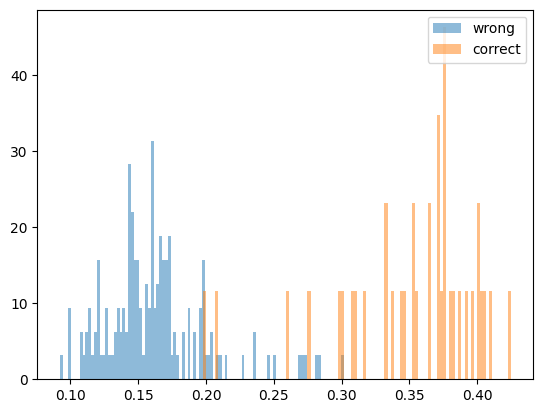

In [340]:
df_merged_d = df_merged[df_merged['answer'] == 'D'].reset_index(drop=True)
scores_wrong = df_merged_d[['score_A','score_B','score_C','score_E']].values.reshape(-1,1)
scores_correct = df_merged_d[['score_D']].values

# plot histogram of scores
import matplotlib.pyplot as plt

plt.hist(scores_wrong, bins=100, alpha=0.5, label='wrong', density=True)
plt.hist(scores_correct, bins=100, alpha=0.5, label='correct', density=True)

plt.legend(loc='upper right')

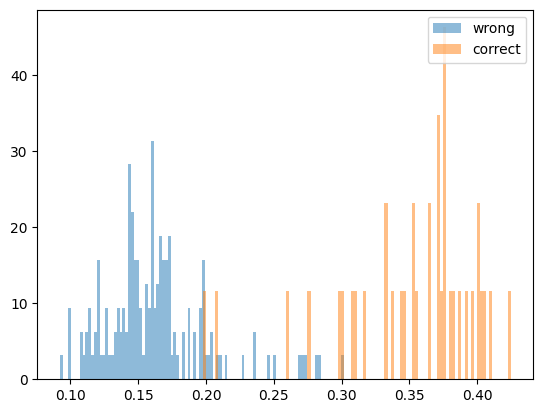

In [341]:
df_merged_d = df_merged[df_merged['answer'] == 'D'].reset_index(drop=True)
scores_wrong = df_merged_d[['score_A','score_B','score_C','score_E']].values.reshape(-1,1)
scores_correct = df_merged_d[['score_D']].values

# plot histogram of scores
import matplotlib.pyplot as plt

plt.hist(scores_wrong, bins=100, alpha=0.5, label='wrong', density=True)
plt.hist(scores_correct, bins=100, alpha=0.5, label='correct', density=True)

plt.legend(loc='upper right')

In [342]:
import pandas as pd
import numpy as np

# Define a function to apply for each group
def get_top_scores(sub_df):
    # Extract scores
    x = sub_df[['score_A', 'score_B', 'score_C', 'score_D', 'score_E']].values
    
    # Get the max value for each column in the group
    max_scores = np.mean(x, axis=0)
    
    # Get the top 3 columns by scores
    top3_cols = max_scores.argsort()[-3:][::-1]
    columns = ['A', 'B', 'C', 'D', 'E']
    top3_scores = [columns[i] for i in top3_cols]
    
    # Extract the letters from the column names and join them
    top3_str = ' '.join([score.split('_')[-1] for score in top3_scores])
    
    return top3_str

# Group by 'promp' and apply the function
df_grouped = df_merged.groupby('prompt').apply(get_top_scores).reset_index(name='prediction_2')
df_grouped

,prompt,prediction_2
0,"How do the Lunar Laser Ranging Experiment, ra...",B E C
1,How many crystallographic point groups are th...,B E C
2,What are amorphous ferromagnetic metallic all...,D E B
3,What are coherent turbulent structures?,C D B
4,What are permutation-inversion groups?,E B A
...,...,...
195,Who published the first theory that was able ...,A B D
196,Who shared the other half of the Nobel Prize ...,B E C
197,Who was Giordano Bruno?,D E C
198,Who was the first person to describe the pulm...,E A C


In [343]:
# merge with original df
df_merged = df_merged.merge(df_grouped, on='prompt', how='inner')
df_merged

,Unnamed: 0,prompt,A,B,C,D,E,answer,id,context,...,score2,score3,score4,prediction,score_A,score_B,score_C,score_D,score_E,prediction_2
0,0,Which of the following statements accurately ...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,0,Context: The homogeneously distributed mass of...,...,0.198719,-0.531988,0.285659,D C E,0.159289,0.111204,0.182683,0.379351,0.167472,D C E
1,1,Which of the following is an accurate definit...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,1,"Context: To describe these systems, it is conv...",...,0.332405,0.439984,0.432466,A C E,0.381497,0.139408,0.170935,0.153501,0.154659,A C E
2,2,Which of the following statements accurately ...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,2,"Context: ""Caput Medusae"" [Latin] means ""Head o...",...,-0.621251,-0.350849,-0.124886,A C D,0.266482,0.141791,0.249483,0.190374,0.151870,A C D
3,3,What is the significance of regularization in...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,3,Context: (Another way to avoid the infinity...,...,-0.664490,0.174010,0.245479,C A D,0.296385,0.115988,0.320251,0.138463,0.128913,C A D
4,4,Which of the following statements accurately ...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,4,"Context: The finer the grating spacing, the gr...",...,0.518145,-0.520094,0.420676,D A E,0.195461,0.136588,0.135580,0.382910,0.149460,D A E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,What is the relation between the three moment...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,195,Context: Then the bending moments at the thr...,...,-0.303445,0.623660,0.444911,C A E,0.185934,0.162042,0.348892,0.138056,0.165076,C A E
196,196,"What is the throttling process, and why is it...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,196,Context: Most liquids such as hydraulic oils w...,...,-0.344868,0.349569,0.212258,B C E,0.119749,0.371220,0.245647,0.122665,0.140719,B C E
197,197,What happens to excess base metal as a soluti...,"The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B,197,"Context: Instead, an examination of the micros...",...,-0.085280,-0.162696,-0.154961,B A D,0.266973,0.269462,0.147039,0.158875,0.157651,B A D
198,198,"What is the relationship between mass, force,...",Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,Mass is an i

In [344]:
df_merged['is_correct_answer'] = df_merged[['answer', 'prediction']].apply(lambda x: x['answer'] == x['prediction'][0], axis=1)
df_merged['is_correct_answer_2'] = df_merged[['answer', 'prediction_2']].apply(lambda x: x['answer'] == x['prediction_2'][0], axis=1)

df_merged.groupby('prompt').is_correct_answer.mean().mean(), df_merged.groupby('prompt').is_correct_answer_2.mean().mean()

(0.965, 0.965)

In [345]:
df_merged['is_correct_answer'] = df_merged[['answer', 'prediction']].apply(lambda x: x['answer'] == x['prediction'][0], axis=1)
df_merged['is_correct_answer_2'] = df_merged[['answer', 'prediction_2']].apply(lambda x: x['answer'] == x['prediction_2'][0], axis=1)

df_merged.groupby('prompt').is_correct_answer.mean().mean()

0.965

In [346]:

df_merged.groupby('prompt').is_correct_answer_2.mean().mean()

0.965

In [347]:
df_merged['is_correct_answer'] = df_merged[['answer', 'prediction']].apply(lambda x: x['answer'] == x['prediction'][2], axis=1)
df_merged['is_correct_answer_2'] = df_merged[['answer', 'prediction_2']].apply(lambda x: x['answer'] == x['prediction_2'][1], axis=1)
df_merged.is_correct_answer.mean(), df_merged.is_correct_answer_2.mean()

(0.015, 0.0)